# SVM 

P(y=1∣x)=1/1+exp(Af(x)+B)

In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# load csv
df = pd.read_csv('../data/dataset/full_updated_data.csv')
df

,jobs,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,...,iptm,mpDockQ/pDockQ,file_source,label,pred,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,2GNJ_1_and_2GNJ_2,C_B,22.0,0.318,0.318,0.273,22.0,0.726,9.0,14.0,...,0.959609,0.512518,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.957888,0.954887,0.953721,0.952660,0.951900
1,1JBP_1_and_1JBP_2,C_B,22.0,0.318,0.318,0.273,22.0,0.718,12.0,16.0,...,0.959037,0.513515,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956872,0.954217,0.954161,0.952466,0.951730
2,3OVV_1_and_3OVV_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958931,0.519170,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956851,0.952951,0.952088,0.952080,0.951719
3,2VO3_1_and_2VO3_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958905,0.495511,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956646,0.952902,0.951221,0.950663,0.949503
4,2VNW_1_and_2VNW_2,C_B,22.0,0.318,0.318,0.273,22.0,0.729,7.0,15.0,...,0.958796,0.516269,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956535,0.954254,0.953772,0.951799,0.594339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,7DDO_1_and_7DDO_2,C_B,119.0,0.328,0.311,0.185,283.0,0.012,35.0,1.0,...,0.157226,0.707733,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.263660,0.263573,0.261066,0.257602,0.257515
8253,6LZG_2_and_6LZG_1,C_B,67.0,0.388,0.284,0.194,106.0,0.052,12.0,0.0,...,0.150241,0.581248,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.260272,0.258493,0.257715,0.257621,0.248961
8254,7A6O_2_and_7A6O_1,C_B,16.0,0.375,0.188,0.313,16.0,0.160,4.0,7.0,...,0.148244,0.084546,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.243742,0.231274,0.230923,0.222313,0.219328
8255,7EOW_1_and_7EOW_2,C_B,33.0,0.303,0.182,0.424,50.0,0.179,12.0,5.0,...,0.141367,0.215266,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.230280,0.228237,0.228042,0.226219,0.217530


In [5]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=0.1, probability=True)
svm_classifier.fit(X_train, y_train)

probabilities = svm_classifier.predict_proba(X_test)

In [6]:
acc_cv = []
fps_cv = []
param_grid = {'threshold': [0.1, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9, 0.95]}
for threshold in param_grid['threshold']:
    y_pred = (probabilities[:, 1] >= threshold).astype(int)
    acc_cv.append(accuracy_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    fps_cv.append(fpr)

Text(0, 0.5, 'False Positive Rate')

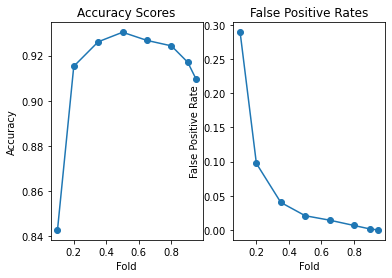

In [7]:
# Plot the accuracy scores
plt.subplot(1, 2, 1)
plt.plot(param_grid['threshold'], acc_cv, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot the false positive rates
plt.subplot(1, 2, 2)
plt.plot(param_grid['threshold'], fps_cv, marker='o')
plt.title('False Positive Rates')
plt.xlabel('Fold')
plt.ylabel('False Positive Rate')

In [8]:
len(svm_classifier.support_vectors_)

952

In [9]:
len(X_train)

6605

# TEST

In [10]:
# save model
from joblib import dump, load  

dump(svm_classifier, 'svm_prob.joblib')


['svm_prob.joblib']

In [11]:
# import model
svm_classifier = load('svm_prob.joblib')

In [65]:
test_path = '/n/holyscratch01/ramanathan_lab/yuting/outputs/validation_1222/predictions_with_good_interpae.csv'
test_dir = '/n/holyscratch01/ramanathan_lab/yuting/outputs/validation_1222'
test_df = pd.read_csv(test_path)
test_df['file_source'] = f"{test_dir}" 

In [66]:
test_df

,jobs,pdb,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,int_solv_en,int_area,pvalue,pi_score,iptm_ptm,iptm,mpDockQ/pDockQ,file_source
0,HOPX_and_Hdac2,NaN,C_B,21.0,0.238,0.190,0.429,19.0,0.409,8.0,0.0,-5.05,771.76,NaN,-0.77,0.610698,0.581448,0.215746,/n/holyscratch01/ramanathan_lab/yuting/outputs...
1,Nanog_and_Dax1,NaN,C_B,123.0,0.341,0.415,0.138,185.0,0.185,30.0,1.0,-64.98,3887.24,NaN,0.83,0.470766,0.488710,0.167606,/n/holyscratch01/ramanathan_lab/yuting/outputs...
2,Nanog_and_Rif1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No interface detected,0.307850,0.273031,0.021086,/n/holyscratch01/ramanathan_lab/yuting/outputs...
3,Oct4_and_Sox2,NaN,C_B,21.0,0.381,0.286,0.238,20.0,0.311,5.0,5.0,-9.68,1178.09,NaN,-1.94,0.265663,0.251397,0.047096,/n/holyscratch01/ramanathan_lab/yuting/outputs...
4,HOPX_and_Smad4,NaN,C_B,33.0,0.333,0.152,0.303,41.0,0.237,8.0,2.0,-1.23,810.91,NaN,-1.88,0.277794,0.237290,0.099213,/n/holyscratch01/ramanathan_lab/yuting/outputs...
5,Nanog_and_Oct4,NaN,C_B,66.0,0.258,0.227,0.273,90.0,0.187,12.0,5.0,-21.34,2332.57,NaN,-0.36,0.209458,0.182871,0.032469,/n/holyscratch01/ramanathan_lab/yuting/outputs...
6,Nanog_and_Zfp281,NaN,C_B,84.0,0.357,0.310,0.179,109.0,0.189,20.0,3.0,-19.51,2995.97,NaN,0.45,0.181346,0.173493,0.028440,/n/holyscratch01/ramanathan_lab/yuting/outputs...


In [67]:
test_df['label'] = np.nan
n = len(test_df)
for i in range(n):
    pair = str(test_df['jobs'][i])
    pair = re.sub(r"_and_", ";", pair)
    test_df.loc[i, 'label'] = 1

In [68]:
new_column_names = {col: col.replace(' ', '') for col in test_df.columns}
test_df.rename(columns=new_column_names, inplace=True)
columns_to_convert = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en', 'int_area',
       'pi_score', 'pdb', 'pvalue', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ']
# Convert the specified columns to numeric
for column in columns_to_convert:
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')
    
# Add predictions
for i in range(n):
    if test_df.loc[i, 'pi_score'] <= 0:
        test_df.loc[i, 'pred'] = 0
    else: test_df.loc[i, 'pred'] = 1
    
# Remove rows with NaN values in selected columns  
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en', 'int_area',
       'pi_score', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ']
test_df = test_df.dropna(subset=selected_columns)
test_df = test_df.reset_index(drop=True)

In [69]:
test_df

,jobs,pdb,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,...,int_solv_en,int_area,pvalue,pi_score,iptm_ptm,iptm,mpDockQ/pDockQ,file_source,label,pred
0,HOPX_and_Hdac2,NaN,C_B,21.0,0.238,0.190,0.429,19.0,0.409,8.0,...,-5.05,771.76,NaN,-0.77,0.610698,0.581448,0.215746,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0
1,Nanog_and_Dax1,NaN,C_B,123.0,0.341,0.415,0.138,185.0,0.185,30.0,...,-64.98,3887.24,NaN,0.83,0.470766,0.488710,0.167606,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0
2,Oct4_and_Sox2,NaN,C_B,21.0,0.381,0.286,0.238,20.0,0.311,5.0,...,-9.68,1178.09,NaN,-1.94,0.265663,0.251397,0.047096,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0
3,HOPX_and_Smad4,NaN,C_B,33.0,0.333,0.152,0.303,41.0,0.237,8.0,...,-1.23,810.91,NaN,-1.88,0.277794,0.237290,0.099213,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0
4,Nanog_and_Oct4,NaN,C_B,66.0,0.258,0.227,0.273,90.0,0.187,12.0,...,-21.34,2332.57,NaN,-0.36,0.209458,0.182871,0.032469,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0
5,Nanog_and_Zfp281,NaN,C_B,84.0,0.357,0.310,0.179,109.0,0.189,20.0,...,-19.51,2995.97,NaN,0.45,0.181346,0.173493,0.028440,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0


In [70]:
## retrive all rank 1-4 data based on the df rowname and saved all into a new csv file
name_list = test_df.jobs.tolist()
file_paths = test_df.file_source.tolist()
print(len(name_list),len(file_paths))

6 6


In [ ]:
import os
import json
def iptm_more(name_list, file_paths):
    res = dict()
    count = 0
    for f, name in zip(file_paths, name_list):
        file_path = os.path.join(f, name, "ranking_debug.json")
        with open(file_path, "r") as json_file:
            data = json.load(json_file)
            count+=1
        res[name] = data['iptm+ptm']
        print(count)
    return res

res = iptm_more(name_list, file_paths)

ans = list(res.keys())
for i in name_list:
    if i not in ans:
        print(i)

1
2
3
4
5
6


In [72]:
res_test_df = pd.DataFrame.from_dict(res, orient='index')
res_test_df.reset_index(inplace=True)
res_test_df = res_test_df.rename(columns={"index": "jobs"})

In [73]:
res_test_df

,jobs,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,HOPX_and_Hdac2,0.457607,0.296250,0.452281,0.515247,0.610698
1,Nanog_and_Dax1,0.467405,0.470766,0.461908,0.469663,0.468841
2,Oct4_and_Sox2,0.193240,0.169670,0.164415,0.265663,0.163266
3,HOPX_and_Smad4,0.215960,0.277794,0.211501,0.236326,0.209375
4,Nanog_and_Oct4,0.209458,0.205119,0.186684,0.172217,0.151656
5,Nanog_and_Zfp281,0.172292,0.181346,0.172157,0.172906,0.160979


In [74]:
test_df = test_df.merge(res_test_df, on='jobs', how='left', indicator=False)
test_df

,jobs,pdb,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,...,iptm,mpDockQ/pDockQ,file_source,label,pred,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,HOPX_and_Hdac2,NaN,C_B,21.0,0.238,0.190,0.429,19.0,0.409,8.0,...,0.581448,0.215746,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.457607,0.296250,0.452281,0.515247,0.610698
1,Nanog_and_Dax1,NaN,C_B,123.0,0.341,0.415,0.138,185.0,0.185,30.0,...,0.488710,0.167606,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.467405,0.470766,0.461908,0.469663,0.468841
2,Oct4_and_Sox2,NaN,C_B,21.0,0.381,0.286,0.238,20.0,0.311,5.0,...,0.251397,0.047096,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.193240,0.169670,0.164415,0.265663,0.163266
3,HOPX_and_Smad4,NaN,C_B,33.0,0.333,0.152,0.303,41.0,0.237,8.0,...,0.237290,0.099213,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.215960,0.277794,0.211501,0.236326,0.209375
4,Nanog_and_Oct4,NaN,C_B,66.0,0.258,0.227,0.273,90.0,0.187,12.0,...,0.182871,0.032469,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.209458,0.205119,0.186684,0.172217,0.151656
5,Nanog_and_Zfp281,NaN,C_B,84.0,0.357,0.310,0.179,109.0,0.189,20.0,...,0.173493,0.028440,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.172292,0.181346,0.172157,0.172906,0.160979


In [75]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = test_df[selected_columns]
y_test = test_df.label.astype(int)

scaler = StandardScaler()
X_test = scaler.fit_transform(X)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

0.5
[[0 0]
 [3 3]]
nan
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         6

    accuracy                           0.50         6
   macro avg       0.50      0.25      0.33         6
weighted avg       1.00      0.50      0.67         6



/tmp/ipykernel_122448/559684485.py:16: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp/(fp+tn)
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in 

In [77]:
test_df['pred'] = y_pred

In [75]:
test_df['pi_score']

0   -0.77
1    0.83
2   -1.94
3   -1.88
4   -0.36
5    0.45
Name: pi_score, dtype: float64

### Application cases